## **Notebook PC1_Ativ2**
## Regularized Linear Classifiers for MNIST database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Arthur Felipe dos Satos Fernandes


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (10000, 784)
Shape of yt:  (10000,)


In [2]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)


[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


##**A classifier with ridge regularization**


In [3]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.850 (0.003)


In [4]:
from sklearn.metrics import confusion_matrix

model.fit(X,y)
print(f"Performance on the test data: {model.score(Xt,yt)} \n")
confusion_matrix(model.predict(Xt),yt)

Performance on the test data: 0.8604 



array([[ 945,    0,   18,    4,    0,   23,   18,    5,   14,   15],
       [   0, 1107,   54,   18,   22,   18,   10,   41,   46,   11],
       [   1,    2,  813,   23,    6,    3,    9,   15,   11,    2],
       [   2,    2,   25,  879,    0,   72,    0,    6,   30,   17],
       [   2,    3,   15,    5,  882,   24,   22,   26,   27,   80],
       [   7,    1,    0,   17,    5,  659,   17,    1,   39,    1],
       [  13,    5,   42,    9,   10,   24,  875,    1,   15,    1],
       [   2,    1,   22,   21,    2,   14,    0,  883,   12,   77],
       [   7,   14,   38,   22,   11,   38,    7,    0,  760,    4],
       [   1,    0,    5,   12,   44,   17,    0,   50,   20,  801]],
      dtype=int64)

##**Another classifier with ridge regularization**

In [5]:
from sklearn.linear_model import RidgeClassifierCV

c_values = [pow(2,d) for d in range(-10, 18, 2)]
model1 = RidgeClassifierCV(alphas=c_values)
model1.fit(X,y)
print(f"Performance on the test data: {model1.score(Xt,yt)} \n")
confusion_matrix(model1.predict(Xt),yt)

Performance on the test data: 0.8617 



array([[ 944,    0,   18,    4,    0,   24,   17,    5,   14,   16],
       [   0, 1106,   55,   17,   21,   18,   10,   44,   47,   11],
       [   2,    2,  817,   20,    6,    4,   10,   15,   11,    2],
       [   2,    2,   25,  888,    0,   75,    0,    6,   31,   17],
       [   2,    3,   15,    5,  887,   24,   22,   25,   25,   79],
       [   8,    1,    0,   15,    3,  653,   18,    0,   40,    0],
       [  12,    5,   38,    9,    9,   24,  875,    1,   17,    1],
       [   2,    1,   18,   20,    1,   15,    0,  886,   12,   76],
       [   7,   15,   40,   21,    9,   39,    6,    0,  758,    4],
       [   1,    0,    6,   11,   46,   16,    0,   46,   19,  803]],
      dtype=int64)

##**Visualization tools for unveiling the classification strategy**

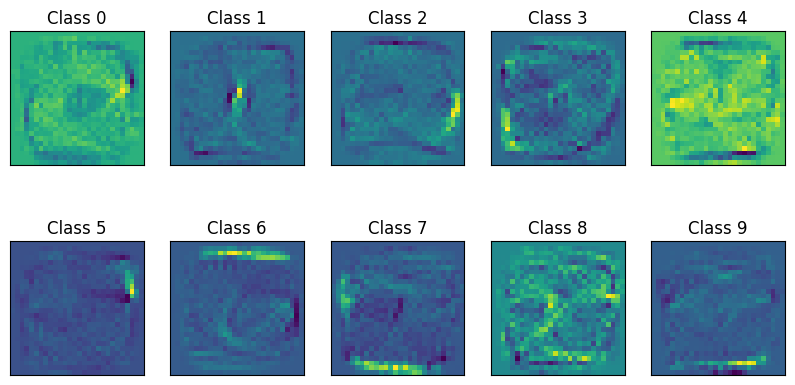

In [6]:
# Only for the MNIST dataset
# weights = model.coef_.copy() # Run this command for the RidgeClassifier
weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

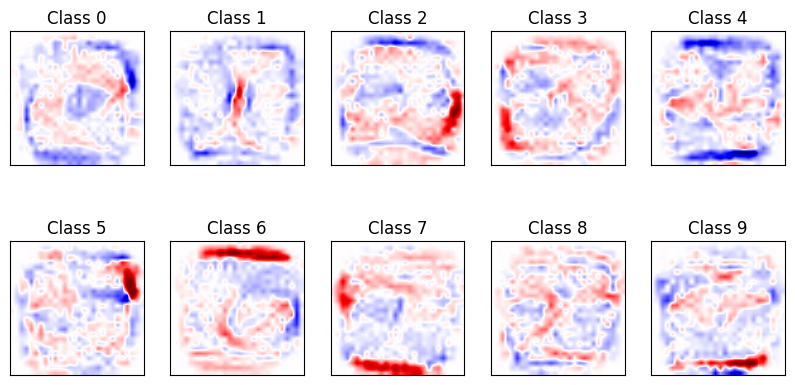

In [7]:
# Only for the MNIST dataset
# weights = model.coef_.copy() # Run this command for the RidgeClassifier
weights = model1.coef_.copy() # Run this command for the RidgeClassifierCV
scale = np.abs(weights).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[i,:].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

a) Embora ambos realizem a regularização L2, na atividade 2, é realizada a validação cruzada do tipo Leave-One-Out, onde uma amostra é considerada como caso de teste enquanto todas as demais são utilizadas como dados de treinamento, e o processo é repetido para cada uma das N amostras.

b) O segundo método possui anexado a mecânica da Validação Cruzada para aumentar a confiança da regressão, em troca de uma queda no desempenho.

c) Busca identificar pela distribuição das cores de cada figura, um método que não eficiente o suficiente para a maior parte dos casos

d) Embora o banco de dados MNIST apresente 10 mil amostras a mais que o CIFAR-10, no segundo, cada amostra representa uma imagem colorida (32x32x3) enquanto que no MNIST cada amostra representa uma imagem em escala de cinza (28x28x1). Essa diferença significa que no caso do MNIST, o classificador analisa cerca de 47 milhões de valores e no caso do CIFAR-10, são analisados cerca de 154 milhões.